In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
io = r'/home/gg/cv_works/data.xls'

In [3]:
train_data = pd.read_excel(io)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       351 non-null    int64  
 1   性别 男1女0  351 non-null    int64  
 2   籍贯       351 non-null    object 
 3   身高(cm)   351 non-null    float64
 4   体重(kg)   351 non-null    float64
 5   鞋码       351 non-null    float64
 6   50米成绩    350 non-null    float64
 7   肺活量      351 non-null    int64  
 8   喜欢颜色     351 non-null    object 
 9   喜欢运动     351 non-null    int64  
 10  喜欢文学     351 non-null    int64  
 11  喜欢数学     0 non-null      float64
 12  喜欢模式识别   0 non-null      float64
dtypes: float64(6), int64(5), object(2)
memory usage: 35.8+ KB


In [5]:
data=train_data[train_data['肺活量'].notnull()]

<AxesSubplot:ylabel='性别 男1女0'>

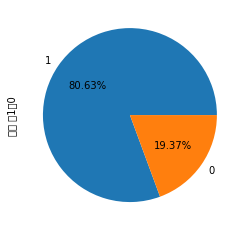

In [6]:
data['性别 男1女0'].value_counts().plot.pie(autopct = '%1.2f%%')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       351 non-null    int64  
 1   性别 男1女0  351 non-null    int64  
 2   籍贯       351 non-null    object 
 3   身高(cm)   351 non-null    float64
 4   体重(kg)   351 non-null    float64
 5   鞋码       351 non-null    float64
 6   50米成绩    350 non-null    float64
 7   肺活量      351 non-null    int64  
 8   喜欢颜色     351 non-null    object 
 9   喜欢运动     351 non-null    int64  
 10  喜欢文学     351 non-null    int64  
 11  喜欢数学     0 non-null      float64
 12  喜欢模式识别   0 non-null      float64
dtypes: float64(6), int64(5), object(2)
memory usage: 38.4+ KB


In [12]:
del(data['喜欢数学'])
del(data['喜欢模式识别'])
Ndata=data.dropna()

In [13]:
male_data=Ndata[train_data['性别 男1女0']>0]

In [18]:
female_data=Ndata[train_data['性别 男1女0']<=0]

In [19]:
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 5 to 344
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       68 non-null     int64  
 1   性别 男1女0  68 non-null     int64  
 2   籍贯       68 non-null     object 
 3   身高(cm)   68 non-null     float64
 4   体重(kg)   68 non-null     float64
 5   鞋码       68 non-null     float64
 6   50米成绩    68 non-null     float64
 7   肺活量      68 non-null     int64  
 8   喜欢颜色     68 non-null     object 
 9   喜欢运动     68 non-null     int64  
 10  喜欢文学     68 non-null     int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 6.4+ KB


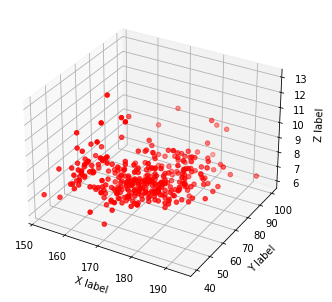

In [29]:
from mpl_toolkits.mplot3d import Axes3D
xs2,ys2,zs2=data['身高(cm)'],data['体重(kg)'],data['50米成绩']
xs3,ys3,zs3=female_data['身高(cm)'],male_data['体重(kg)'],male_data['50米成绩']


fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

 # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(xs2,ys2,zs2,c='r')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')
plt.savefig('test2')
plt.show()

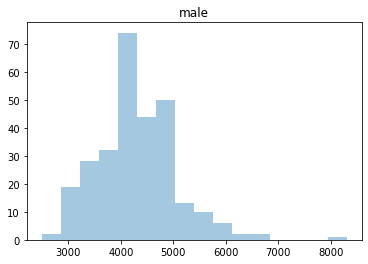

In [10]:
sns.distplot(x=male_data['肺活量'],kde=False,bins=16,label = 'male_height')
plt.title("male")
plt.show()

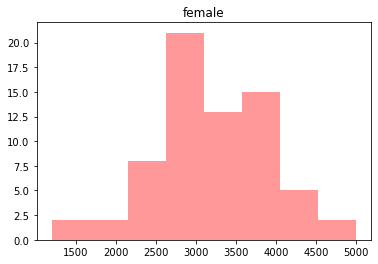

In [11]:
sns.distplot(x=female_data['肺活量'],color="r",kde=False)
plt.title("female")
plt.show()

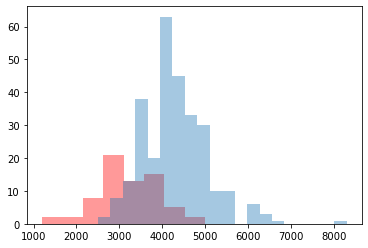

In [15]:
sns.distplot(x=female_data['肺活量'],color="r",kde=False)
sns.distplot(x=male_data['肺活量'],kde=False)

plt.show()

Text(0.5, 1.0, 'female&male')

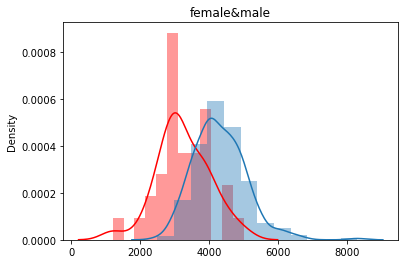

In [16]:
sns.distplot(x=female_data['肺活量'],
             color="r",
             bins=12,
            label='male')
sns.distplot(x=male_data['肺活量'],
             bins=12)
plt.title("female&male")

<AxesSubplot:xlabel='身高(cm)', ylabel='体重(kg)'>

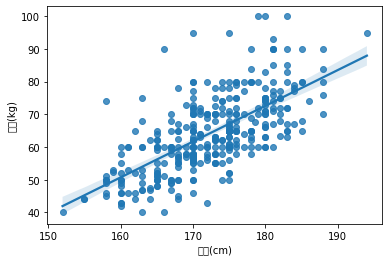

In [17]:
sns.regplot(x="身高(cm)", y="体重(kg)",data=train_data)

In [18]:
female_h_mean=female_data['身高(cm)'].mean()

In [19]:
male_h_mean=male_data['身高(cm)'].mean()

In [20]:
male_h_std=male_data['身高(cm)'].std()

In [21]:
female_h_std=female_data['身高(cm)'].std()

In [22]:
female_w_mean=female_data['体重(kg)'].mean()
male_w_mean=male_data['体重(kg)'].mean()
male_w_std=male_data['体重(kg)'].std()
female_w_std=female_data['体重(kg)'].std()

In [36]:
print(train_data['身高(cm)'].std())

7.170384360995712
